## The Ground Truth Duplicate Problem

Since the test set has overlapping patches from the same tile, and ground truth labels are **tile-based** (not patch-based), then:

### **Scenario: A rock at the boundary between two patches**

```
Tile 2626_1102 (original 2000×2000)
┌─────────────────────────────────┐
│                                 │
│  ┌──────────┐                  │
│  │ Patch    │ 🪨 ← Rock here   │
│  │ 0_0      │                  │
│  └──────────┘                  │
│       ┌──────────┐             │
│       │ Patch    │ 🪨 ← Same rock
│       │ 0_1      │             │
│       └──────────┘             │
│                                 │
└─────────────────────────────────┘
```

**When Alexis created patch labels from tile labels:**
- He took tile-level annotations (point coordinates)
- Generated bounding boxes
- **Assigned the same box to BOTH patches** if rock is in overlap region

**Result:** Ground truth labels have duplicates!

---

## We Need to Remove GT Duplicates

**We will use IoU=0.9**
- Ground truth boxes in overlap regions should be **identical** (same global coordinates)
- IoU=0.9 ensures we only remove exact duplicates, not nearby distinct rocks
- Lower threshold (0.5) might incorrectly merge two real rocks that are close together


## Evaluation Strategy

### **Step 1: Create Clean Ground Truth**

In [1]:
# Remove exact duplicates from ground truth
!python ../scripts/postprocessing/yolo_to_shapefile.py \
  --tif_dir ../data/swisstopo_data/images/test \
  --labels_dir ../data/swisstopo_data/labels/test \
  --out ../outputs/shapefiles/test_GT_with_duplicates.shp \
  --nms_iou 0.0

!python ../scripts/postprocessing/yolo_to_shapefile.py \
  --tif_dir ../data/swisstopo_data/images/test \
  --labels_dir ../data/swisstopo_data/labels/test \
  --out ../outputs/shapefiles/test_GT_clean.shp \
  --nms_iou 0.95  # Very high - only exact duplicates

/home/donia/.conda/envs/rock_detection/lib/python3.9/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Total detections before NMS: 369
✅ Wrote 369 boxes to ../outputs/shapefiles/test_GT_with_duplicates.shp
CRS: EPSG:2056
/home/donia/.conda/envs/rock_detection/lib/python3.9/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
Total detections before NMS: 369
✂️  Detections after NMS (IoU=0.95): 361
🗑️  Removed duplicates: 8
✅ Wrote 361 boxes to ../outputs/shapefiles/test_GT_clean.shp
CRS: EPSG:2056


In [2]:
!ls

duplicates_suppression.ipynb


In [3]:
%cd ..

/home/donia/Switzerland_Expansion/switzerland_nationwide_rock_detection


/home/donia/.conda/envs/rock_detection/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!python scripts/analysis/duplicate_suppression/find_duplicates_from_labels.py 

FINDING REAL DUPLICATES FROM YOLO LABELS
Working directory: /home/donia/Switzerland_Expansion/switzerland_nationwide_rock_detection

Found 6 unique tiles
Total patches: 96

Tile 2587_1133: 16 patches
  Found 7 duplicate pair(s):
    2587_1133_0_2.txt ↔ 2587_1133_1_3.txt
      Distance: 5.34 pixels
      Global coords 1: (1423.2, 614.4)
      Global coords 2: (1424.4, 609.2)
    2587_1133_0_2.txt ↔ 2587_1133_1_3.txt
      Distance: 1.70 pixels
      Global coords 1: (1378.4, 448.0)
      Global coords 2: (1379.6, 449.2)
    2587_1133_1_2.txt ↔ 2587_1133_2_3.txt
      Distance: 11.66 pixels
      Global coords 1: (1340.0, 890.8)
      Global coords 2: (1328.4, 892.0)
    2587_1133_1_3.txt ↔ 2587_1133_2_3.txt
      Distance: 9.94 pixels
      Global coords 1: (1322.0, 897.2)
      Global coords 2: (1315.6, 904.8)
    2587_1133_1_3.txt ↔ 2587_1133_2_3.txt
      Distance: 8.25 pixels
      Global coords 1: (1322.0, 897.2)
      Global coords 2: (1328.4, 892.0)
    2587_1133_1_3.txt ↔ 2587_1

In [6]:
!python scripts/analysis/duplicate_suppression/visualize_duplicate_pairs.py

VISUALIZING REAL DUPLICATE PAIRS (GROUPED BY IMAGE PAIR)
Working directory: /home/donia/Switzerland_Expansion/switzerland_nationwide_rock_detection

Found 8 unique image pairs
Total duplicate rocks: 13

--- Processing Pair 1/8 ---
  2587_1133_0_2.txt ↔ 2587_1133_1_3.txt
  2 duplicate rocks
  Loading 2587_1133_0_2.txt...
/home/donia/.conda/envs/rock_detection/lib/python3.9/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
  Loading 2587_1133_1_3.txt...
  Found 2 duplicate boxes in image 1
  Found 2 duplicate boxes in image 2
  ✅ Saved to outputs/duplicate_visualizations_grouped/duplicate_pair_01.png

--- Processing Pair 2/8 ---
  2587_1133_1_2.txt ↔ 2587_1133_2_3.txt
  1 duplicate rocks
  Loading 2587_1133_1_2.txt...
/home/donia/.conda/envs/rock_detection/lib/python3.9/site-packages/rasterio/__init__.py:356: NotGeorefe

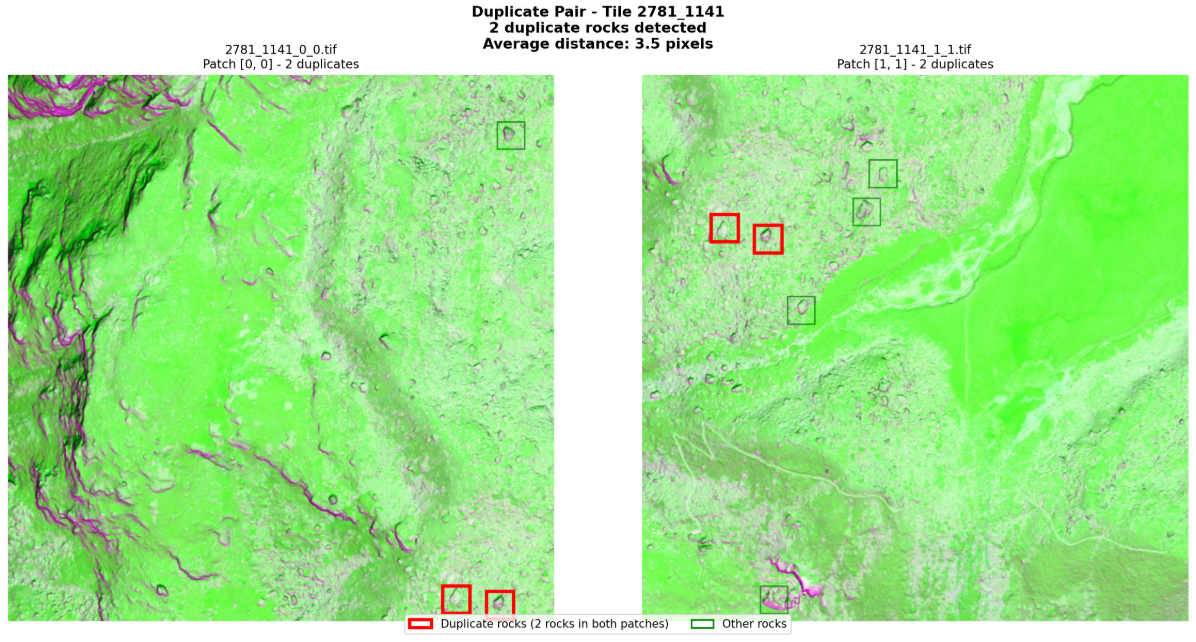